###### Kaggle Dataset Link https://www.kaggle.com/mirichoi0218/insurance
The dataset consists of the following attrbiutes 
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

##### Can we predict the insurance costs

##### Importing the dependencies and packages

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

##### Reading and preprocessing the data

In [3]:
##loading data to pandas dataframe
insurance_dataset=pd.read_csv('insurance.csv')

In [4]:
##first five row
insurance_dataset.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [7]:
insurance_dataset.shape

(1338, 7)

In [8]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#staatistical measures 
insurance_dataset.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
##finding missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

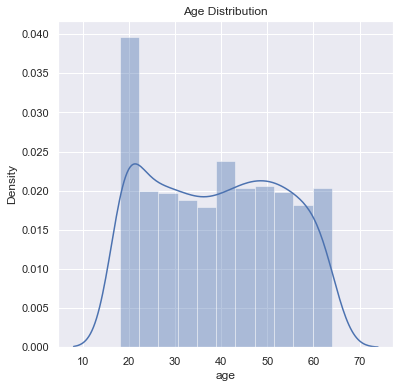

In [11]:
##distribution of age value 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset.age)
plt.title('Age Distribution')

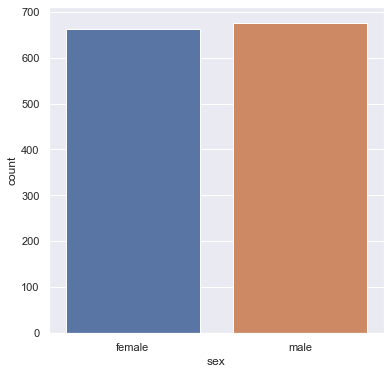

In [12]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.show()

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

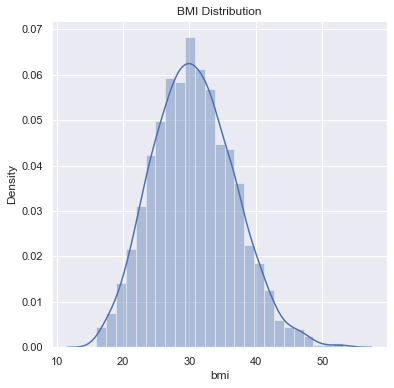

In [13]:
##distribution of age value 
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset.bmi)
plt.title('BMI Distribution')

Normal bmi -> 18.5 -24.9

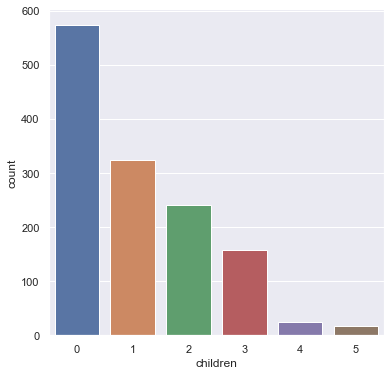

In [19]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.show()

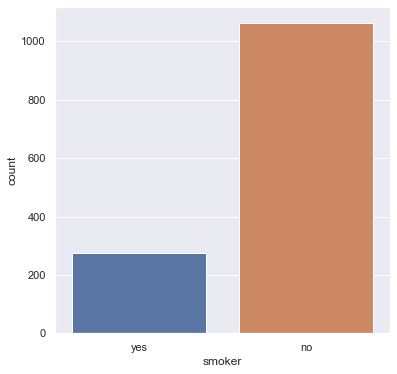

In [18]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.show()

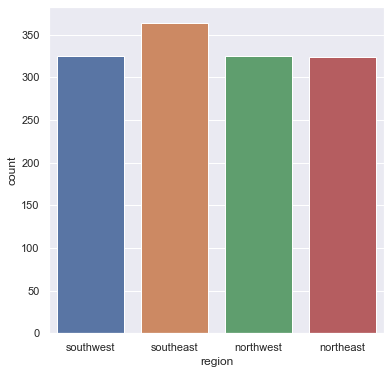

In [17]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.show()

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Charges Distribution')

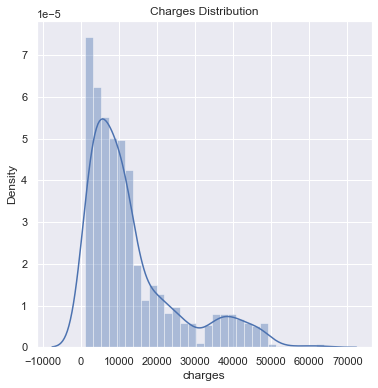

In [20]:
##distribution of charges value 
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset.charges)
plt.title('Charges Distribution')

C:\Users\80217530\AppData\Local\Continuum\anaconda3\envs\cnnenv\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


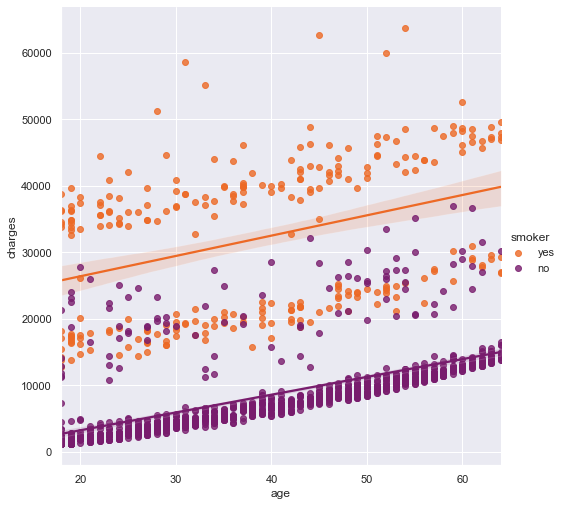

In [44]:
sns.lmplot(x="age", y="charges", hue="smoker", data=insurance_dataset, palette = 'inferno_r', size = 7)


Data preprocessing 
Encoding categorical columns into numerical columns 


In [21]:
insurance_dataset_encoded=insurance_dataset.copy()

In [45]:
### Using label encoder
#sex
#le = LabelEncoder()
#le.fit(data.sex.drop_duplicates()) 
#data.sex = le.transform(data.sex)
# smoker or not
#le.fit(data.smoker.drop_duplicates()) 
#data.smoker = le.transform(data.smoker)
#region
#le.fit(data.region.drop_duplicates()) 
#data.region = le.transform(data.region)

In [22]:
### Encoding sex column 
insurance_dataset_encoded.replace({'sex':{'male':0,'female':1}},inplace=True)
### Encoding smoker column 
insurance_dataset_encoded.replace({'smoker':{'yes':0,'no':1}},inplace=True)
### Encoding region column 
insurance_dataset_encoded.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [23]:
insurance_dataset_encoded.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       1  16884.92400
1   18    0  33.770         1       1       0   1725.55230
2   28    0  33.000         3       1       0   4449.46200
3   33    0  22.705         0       1       3  21984.47061
4   32    0  28.880         0       1       3   3866.85520

Splitting the features and the target value


In [24]:
X= insurance_dataset_encoded.drop(columns='charges',axis=1)
Y=insurance_dataset_encoded['charges']

Splitting the data into test and training data 

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

MOdelling the linear regression

In [26]:
linRegModel=LinearRegression()

In [27]:
linRegModel.fit(X_train,Y_train)

LinearRegression()

In [28]:
X_train_prediction=linRegModel.predict(X_train)

In [29]:
##training accuracy 
# R square error 
score_1=metrics.r2_score(Y_train,X_train_prediction)
score_2= metrics.mean_absolute_error(Y_train,X_train_prediction)
print('Rsquard eror',score_1)
print('Mean absolute error',score_2)

Rsquard eror 0.751505643411174
Mean absolute error 4150.500304883778


In [30]:
X_test_prediction=linRegModel.predict(X_test)

In [31]:
## evaluating on the test data 
testscore_1=metrics.r2_score(Y_test,X_test_prediction)
testscore_2= metrics.mean_absolute_error(Y_test,X_test_prediction)

In [41]:
print('R2 score',testscore_1)
print('Mean absolute error',testscore_2)

R2 score 0.7447273869684077
Mean absolute error 4267.213826730733


Ridge Regression 

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, Y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, Y_test)))

Training set score: 0.75
Test set score: 0.74


In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, Y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, Y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.75
Test set score: 0.74
Number of features used: 6


XGBoost Regressor

In [35]:
from xgboost import XGBRegressor
#load the model 
xgBoostmodel=XGBRegressor()

In [36]:
#train the model
xgBoostmodel.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:

X_train_prediction=xgBoostmodel.predict(X_train)

In [38]:
X_test_prediction=xgBoostmodel.predict(X_test)

In [40]:
score_1=metrics.r2_score(Y_train,X_train_prediction)
score_2= metrics.mean_absolute_error(Y_train,X_train_prediction)
print('R2 score',score_1)
print('Mean absolute error',score_2)

R2 score 0.9962665931681515
Mean absolute error 440.15837006047025
